<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#adding-the-continents:" data-toc-modified-id="adding-the-continents:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>adding the continents:</a></span></li><li><span><a href="#Explore-the-number-of-death-and-magnitude-per-continent:" data-toc-modified-id="Explore-the-number-of-death-and-magnitude-per-continent:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Explore the number of death and magnitude per continent:</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline

In [2]:
world_earthquake = pd.read_csv('../data/world_earthquakes_06_clean.csv')
world_earthquake.head()

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths
0,1900-05-11 17:23:00,1900,5,11,17:23:00,Japan,38.7,141.1,5.0,7.0,NaN,0
1,1900-07-12 06:25:00,1900,7,12,06:25:00,Turkey,40.3,43.1,NaN,5.9,NaN,140
2,1900-10-29 09:11:00,1900,10,29,09:11:00,Venezuela,11.0,-66.0,0.0,7.7,NaN,0
3,1901-02-15 00:00:00,1901,2,15,00:00:00,China,26.0,100.1,0.0,6.5,NaN,0
4,1901-03-31 07:11:00,1901,3,31,07:11:00,Bulgaria,43.4,28.7,NaN,6.4,NaN,4


## 1/ Adding the continents:

In [3]:
continents = pd.read_csv('../data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [4]:
# rename columns to be able to merge them to world_earthquake
continents = continents.rename(columns = {"Continent" : "continent", "Country" : "country"})

In [5]:
world_earthquake = pd.merge(left = world_earthquake, right = continents)

In [6]:
world_earthquake.head()

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent
0,1900-05-11 17:23:00,1900,5,11,17:23:00,Japan,38.7,141.1,5.0,7.0,NaN,0,Asia
1,1901-08-09 09:23:00,1901,8,9,09:23:00,Japan,40.5,142.5,35.0,7.2,tsunami,0,Asia
2,1902-01-30 14:01:00,1902,1,30,14:01:00,Japan,40.5,141.3,35.0,6.9,NaN,1,Asia
3,1905-06-02 05:39:00,1905,6,2,05:39:00,Japan,34.1,132.5,55.0,7.0,NaN,11,Asia
4,1909-08-14 06:31:00,1909,8,14,06:31:00,Japan,35.4,136.3,5.0,6.7,NaN,41,Asia


## 2/ Explore the number of death per continent:

### 1/Explore number of death and magnitude per continent:

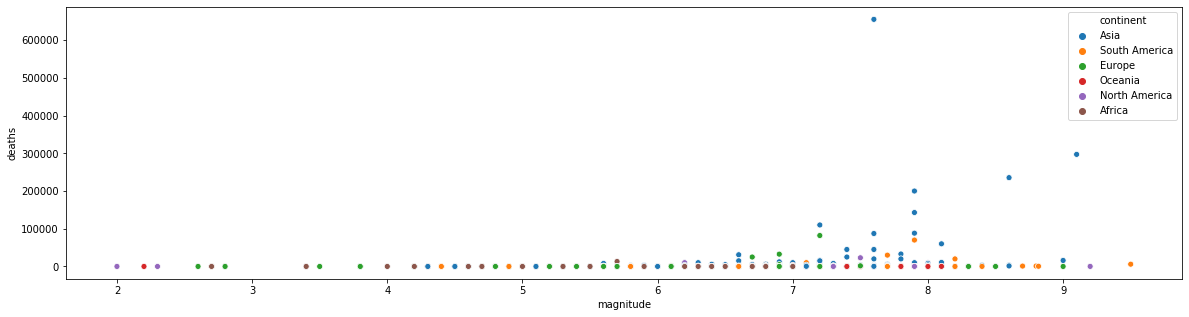

In [7]:
plt.figure(figsize = (20,5))
sns.scatterplot(data=world_earthquake, x="magnitude", y="deaths", hue="continent");

### 2/ The top most deadly earthquakes are in Asia. The worse one in all time was in China with a magnitude of 7.6.

In [8]:
world_earthquake[(world_earthquake.deaths > 600000)]

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent
266,1976-07-27 19:42:00,1976,7,27,19:42:00,China,39.605,117.888,16.7,7.6,NaN,655237,Asia


### 3/ Explore all the countries with more than 10,000 death in the world:

In [9]:
world_earthquake[(world_earthquake.deaths > 10000)]

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent
14,1923-09-01 02:58:00,1923,9,1,02:58:00,Japan,35.405,139.084,35.0,7.9,"tsunami, fire",143000,Asia
80,2011-03-11 14:46:00,2011,3,11,14:46:00,Japan,38.322,142.369,24.4,9.0,tsunami,15894,Asia
98,1939-12-26 23:57:00,1939,12,26,23:57:00,Turkey,39.770,39.533,35.0,7.8,NaN,32968,Asia
152,1999-08-17 00:01:00,1999,8,17,00:01:00,Turkey,40.773,30.003,13.3,7.6,NaN,45000,Asia
202,1920-12-16 12:05:00,1920,12,16,12:05:00,China,36.601,105.317,25.0,8.6,NaN,235502,Asia
207,1927-05-22 22:32:00,1927,5,22,22:32:00,China,37.386,102.311,25.0,7.9,NaN,200000,Asia
252,1970-01-04 17:00:00,1970,1,4,17:00:00,China,24.147,102.462,14.0,7.2,NaN,15621,Asia
266,1976-07-27 19:42:00,1976,7,27,19:42:00,China,39.605,117.888,16.7,7.6,NaN,655237,Asia
346,2008-05-12 06:28:00,2008,5,12,06:28:00,China,31.002,103.322,19.0,7.9,landslide,88287,Asia
376,1976-02-04 09:01:00,1976,2,4,09:01:00,Guatemala,15.296,-89.145,12.3,7.5,tsunami,23000,North America


The top 31 from the deadliest: China 5 times,  Italy 3 times (cause: landslide, tsunami), Japan 2 times (cause: Tsunami), Indonesia 2 times (cause: tsunami), Pakistan 2 times (cause: landslide, liquification), Turkey 2 times, Iran 2 times (cause: landslide), India 2 times. 
It looks like the location is different for countries with deadliest quakes so the prediction where it will happen and when sounds difficult to predict.

In [10]:
world_earthquake.nlargest(31, 'deaths')

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent
266,1976-07-27 19:42:00,1976,7,27,19:42:00,China,39.605,117.888,16.7,7.6,NaN,655237,Asia
774,2004-12-26 00:58:00,2004,12,26,00:58:00,Indonesia,3.287,95.972,30.0,9.1,"tsunami, landslide",297200,Asia
202,1920-12-16 12:05:00,1920,12,16,12:05:00,China,36.601,105.317,25.0,8.6,NaN,235502,Asia
207,1927-05-22 22:32:00,1927,5,22,22:32:00,China,37.386,102.311,25.0,7.9,NaN,200000,Asia
14,1923-09-01 02:58:00,1923,9,1,02:58:00,Japan,35.405,139.084,35.0,7.9,"tsunami, fire",143000,Asia
1104,1948-10-05 20:12:00,1948,10,5,20:12:00,Turkmenistan,37.500,58.000,0.0,7.2,NaN,110000,Asia
346,2008-05-12 06:28:00,2008,5,12,06:28:00,China,31.002,103.322,19.0,7.9,landslide,88287,Asia
919,2005-10-08 03:50:00,2005,10,8,03:50:00,Pakistan,34.465,73.584,23.1,7.6,"landslide, liquification",87351,Asia
564,1908-12-28 04:20:00,1908,12,28,04:20:00,Italy,38.000,15.500,0.0,7.2,tsunami,82000,Europe
971,1970-05-31 20:23:00,1970,5,31,20:23:00,Peru,-9.248,-78.840,73.0,7.9,landslide,70000,South America


### 4/ Looking at magnitude over or equal to 9:

In [11]:
world_earthquake[(world_earthquake.magnitude >= 9)]

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent
80,2011-03-11 14:46:00,2011,3,11,14:46:00,Japan,38.322,142.369,24.4,9.0,tsunami,15894,Asia
630,1964-03-28 03:36:00,1964,3,28,03:36:00,United States,61.017,-147.648,6.6,9.2,tsunami,131,North America
670,1960-05-22 19:11:00,1960,5,22,19:11:00,Chile,-38.235,-73.047,35.0,9.5,tsunami,6000,South America
774,2004-12-26 00:58:00,2004,12,26,00:58:00,Indonesia,3.287,95.972,30.0,9.1,"tsunami, landslide",297200,Asia
1039,1952-11-04 16:58:00,1952,11,4,16:58:00,Russian Federation,52.755,160.057,22.2,9.0,tsunami,0,Europe


Should I look at why so few death for the magnitude > 9 and no death such as USA and Russia?

### 5/ Looking at magnitude similar to tennessee and number of deaths:

In [35]:
world_quake_mag_5 = world_earthquake[(world_earthquake.magnitude <= 5) & (world_earthquake.magnitude > 4)]
world_quake_mag_5.head()

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent
114,1952-10-22 00:00:00,1952,10,22,00:00:00,Turkey,36.500,35.500,NaN,5.0,NaN,10,Asia
132,1975-12-30 14:36:00,1975,12,30,14:36:00,Turkey,38.595,40.526,31.8,4.6,NaN,3,Asia
133,1976-03-25 11:55:00,1976,3,25,11:55:00,Turkey,40.939,42.954,35.0,4.8,NaN,2,Asia
134,1976-04-02 16:58:00,1976,4,2,16:58:00,Turkey,39.801,43.689,25.0,4.6,NaN,4,Asia
136,1976-07-09 09:34:00,1976,7,9,09:34:00,Turkey,38.327,40.463,33.0,4.2,NaN,1,Asia


In [36]:
world_quake_mag_5.shape

(79, 13)

In [37]:
world_quake_mag_5.nlargest(10, 'deaths')

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent
1056,1988-09-06 00:42:00,1988,9,6,00:42:00,Papua New Guinea,-6.062,146.226,0.0,4.3,landslide,74,Oceania
565,1914-05-08 18:01:00,1914,5,8,18:01:00,Italy,37.700,15.200,NaN,4.9,NaN,69,Europe
558,1930-12-02 13:29:00,1930,12,2,13:29:00,Albania,40.300,19.600,4.0,5.0,NaN,25,Europe
343,2006-07-22 01:10:00,2006,7,22,01:10:00,China,27.995,104.138,55.0,4.9,landslide,22,Asia
454,1944-04-05 00:00:00,1944,4,5,00:00:00,Iran,36.800,54.500,7.0,4.8,NaN,20,Asia
380,1978-07-29 14:37:00,1978,7,29,14:37:00,Guatemala,14.758,-90.990,15.0,4.9,NaN,17,North America
912,1997-03-19 19:57:00,1997,3,19,19:57:00,Pakistan,34.790,71.523,15.0,4.9,NaN,15,Asia
1214,1997-07-21 08:45:00,1997,7,21,08:45:00,South Africa,-26.857,26.619,5.0,5.0,NaN,15,Africa
581,1981-02-14 17:27:00,1981,2,14,17:27:00,Italy,40.995,14.614,4.9,4.9,NaN,12,Europe
1127,1991-11-22 00:40:00,1991,11,22,00:40:00,Yemen,13.887,44.068,10.0,4.7,NaN,11,Asia


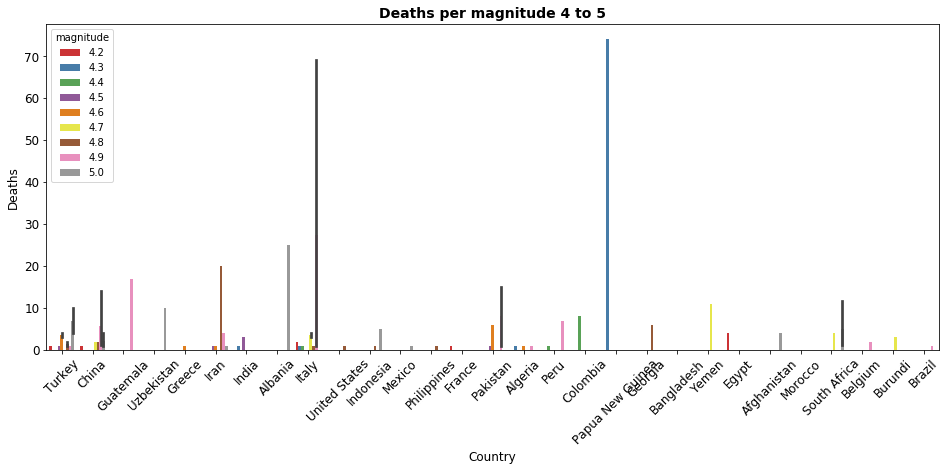

In [62]:
fontsize = 12

plt.figure(figsize=(16,6))
sns.barplot(data= world_quake_mag_5,x ="country",y="deaths", hue="magnitude", palette ="Set1")
plt.xticks(rotation = 45)
plt.xticks(fontsize = fontsize)
plt.xlabel('Country', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Deaths', fontsize = fontsize)
plt.title('Deaths per magnitude 4 to 5', fontsize = 14, fontweight = 'bold');

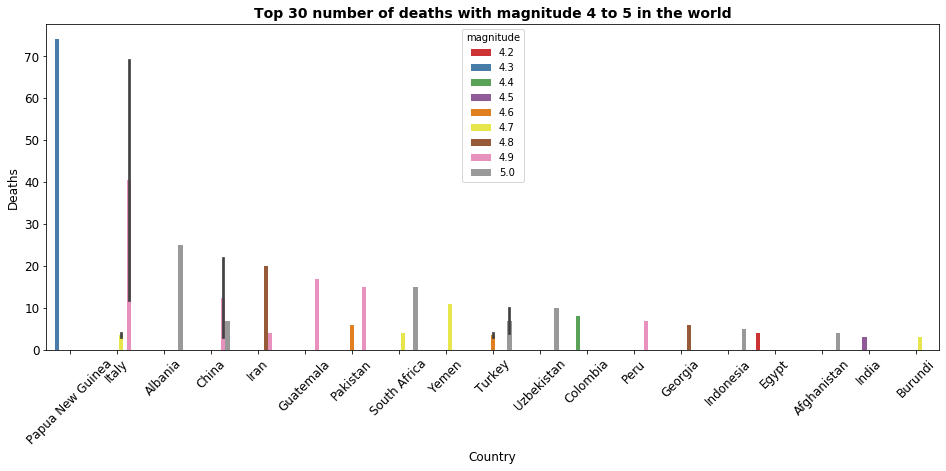

In [77]:
fontsize = 12

plt.figure(figsize=(16,6))
sns.barplot(data= world_quake_mag_5.nlargest(30, 'deaths'),x ="country",y="deaths", hue="magnitude", palette ="Set1")
plt.xticks(rotation = 45)
plt.xticks(fontsize = fontsize)
plt.xlabel('Country', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Deaths', fontsize = fontsize)
plt.title('Top 30 number of deaths with magnitude 4 to 5 in the world', fontsize = 14, fontweight = 'bold');

### 6/ What about lower magnitudes like 3 to 4:

In [31]:
world_quake_mag_4 = world_earthquake[(world_earthquake.magnitude <= 4) & (world_earthquake.magnitude > 3)]
world_quake_mag_4.head()

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent
168,2004-03-01 23:55:00,2004,3,1,23:55:00,Turkey,38.058,38.277,5.0,3.8,NaN,6,Asia
895,1983-08-02 09:01:00,1983,8,2,09:01:00,France,49.150,6.698,0.0,3.5,NaN,1,Europe
896,1991-02-13 15:49:00,1991,2,13,15:49:00,France,44.885,6.760,5.0,3.8,landslide,9,Europe
1129,1984-06-20 14:12:00,1984,6,20,14:12:00,Canada,46.580,-80.800,1.0,3.4,NaN,4,North America
1210,1990-10-18 09:30:00,1990,10,18,09:30:00,South Africa,-26.390,27.349,5.0,4.0,NaN,10,Africa


In [32]:
world_quake_mag_5.shape

(61, 13)

In [33]:
world_quake_mag_4.nlargest(10, 'deaths')

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent
1210,1990-10-18 09:30:00,1990,10,18,09:30:00,South Africa,-26.390,27.349,5.0,4.0,NaN,10,Africa
896,1991-02-13 15:49:00,1991,2,13,15:49:00,France,44.885,6.760,5.0,3.8,landslide,9,Europe
168,2004-03-01 23:55:00,2004,3,1,23:55:00,Turkey,38.058,38.277,5.0,3.8,NaN,6,Asia
1129,1984-06-20 14:12:00,1984,6,20,14:12:00,Canada,46.580,-80.800,1.0,3.4,NaN,4,North America
1211,1992-02-14 17:28:00,1992,2,14,17:28:00,South Africa,-26.420,27.430,5.0,3.4,NaN,4,Africa
1235,1988-09-02 07:26:00,1988,9,2,07:26:00,Czech Republic,49.886,18.489,10.0,3.8,NaN,3,Europe
895,1983-08-02 09:01:00,1983,8,2,09:01:00,France,49.150,6.698,0.0,3.5,NaN,1,Europe


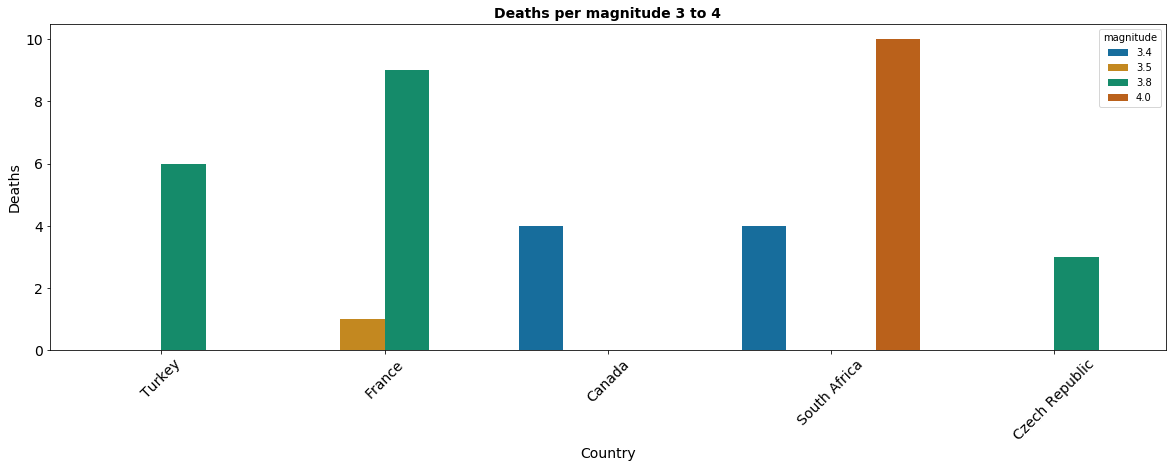

In [75]:
fontsize = 14

plt.figure(figsize=(20,6))
sns.barplot(data= world_quake_mag_4,x ="country",y="deaths", hue="magnitude", palette ="colorblind")
plt.xticks(rotation = 45)
plt.xticks(fontsize = fontsize)
plt.xlabel('Country', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Deaths', fontsize = fontsize)
plt.title('Deaths per magnitude 3 to 4', fontsize = 14, fontweight = 'bold');

### 7/ What about higher magnitudes like 5 to 6:

In [39]:
world_quake_mag_6 = world_earthquake[(world_earthquake.magnitude <= 6) & (world_earthquake.magnitude > 5)]
world_quake_mag_6.head()

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent
44,1965-04-19 23:42:00,1965,4,19,23:42:00,Japan,34.842,138.278,38.7,5.6,NaN,2,Asia
48,1969-09-09 05:15:00,1969,9,9,05:15:00,Japan,35.786,137.093,7.5,6.0,NaN,1,Asia
51,1974-08-03 18:16:00,1974,8,3,18:16:00,Japan,36.016,139.901,51.4,5.6,NaN,2,Asia
53,1978-06-12 08:06:00,1978,6,12,08:06:00,Japan,38.235,142.105,46.2,5.7,tsunami,28,Asia
55,1980-09-23 19:10:00,1980,9,23,19:10:00,Japan,35.997,139.740,82.7,5.3,NaN,2,Asia


In [40]:
world_quake_mag_6.shape

(381, 13)

In [50]:
world_quake_mag_6.nlargest(20, 'deaths')

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent
1190,1960-02-29 23:40:00,1960,2,29,23:40:00,Morocco,30.500,-9.500,NaN,5.7,NaN,13100,Africa
245,1966-03-22 08:11:00,1966,3,22,08:11:00,China,37.551,114.991,17.7,5.6,NaN,8064,Asia
251,1969-07-25 22:49:00,1969,7,25,22:49:00,China,21.612,111.809,3.4,5.9,NaN,3000,Asia
122,1966-08-19 12:22:00,1966,8,19,12:22:00,Turkey,39.161,41.580,17.5,5.8,NaN,2517,Asia
1173,1998-02-04 14:33:00,1998,2,4,14:33:00,Afghanistan,37.080,70.004,17.6,5.9,landslide,2323,Asia
442,1923-05-25 22:21:00,1923,5,25,22:21:00,Iran,35.200,59.200,NaN,5.7,NaN,2219,Asia
109,1946-05-31 03:12:00,1946,5,31,03:12:00,Turkey,39.300,41.200,NaN,5.9,NaN,1300,Asia
1125,1941-01-11 08:32:00,1941,1,11,08:32:00,Yemen,16.400,43.500,NaN,5.9,NaN,1200,Asia
85,1903-05-28 03:58:00,1903,5,28,03:58:00,Turkey,40.900,42.700,NaN,5.8,NaN,1000,Asia
1096,1931-03-31 16:02:00,1931,3,31,16:02:00,Nicaragua,13.200,-85.700,NaN,5.6,fire,1000,North America


In [47]:
world_quake_mag_6.nlargest(10, 'magnitude')

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent
48,1969-09-09 05:15:00,1969,9,9,05:15:00,Japan,35.786,137.093,7.5,6.0,NaN,1,Asia
56,1980-09-24 17:54:00,1980,9,24,17:54:00,Japan,35.525,140.062,71.5,6.0,NaN,2,Asia
99,1941-09-10 21:53:00,1941,9,10,21:53:00,Turkey,39.500,43.300,28.0,6.0,NaN,500,Asia
107,1945-03-20 07:59:00,1945,3,20,07:59:00,Turkey,37.400,35.800,60.0,6.0,NaN,300,Asia
113,1952-01-03 06:03:00,1952,1,3,06:03:00,Turkey,39.900,41.700,NaN,6.0,NaN,103,Asia
121,1964-10-06 14:31:00,1964,10,6,14:31:00,Turkey,40.250,28.208,31.0,6.0,NaN,23,Asia
144,1986-05-05 03:35:00,1986,5,5,03:35:00,Turkey,37.999,37.781,4.1,6.0,NaN,15,Asia
161,2000-06-06 02:41:00,2000,6,6,02:41:00,Turkey,40.737,33.005,7.0,6.0,NaN,2,Asia
163,2000-12-15 16:44:00,2000,12,15,16:44:00,Turkey,38.451,31.265,12.0,6.0,NaN,6,Asia
166,2003-01-27 05:26:00,2003,1,27,05:26:00,Turkey,39.503,39.851,16.1,6.0,NaN,1,Asia


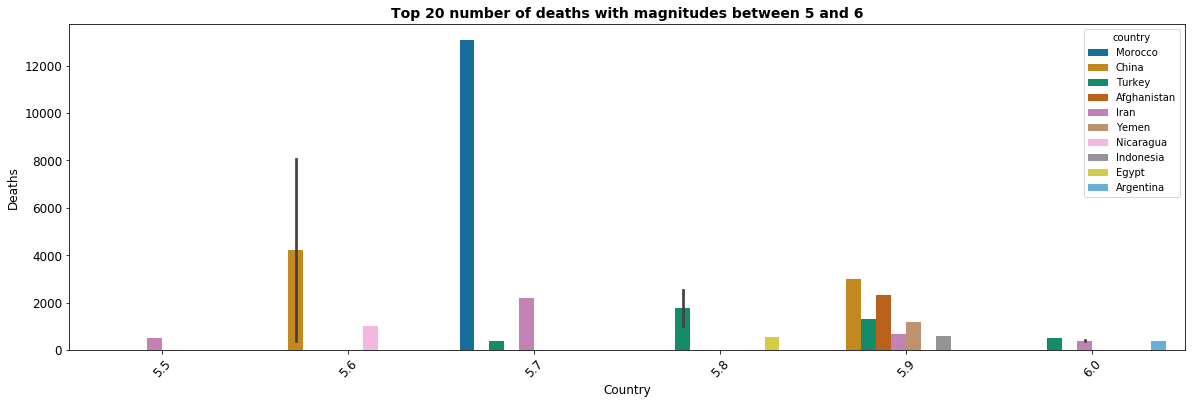

In [74]:
fontsize = 12

plt.figure(figsize=(20,6))
sns.barplot(data= world_quake_mag_6.nlargest(20, 'deaths'),x ="magnitude",y="deaths", hue="country", palette ="colorblind")
plt.xticks(rotation = 45)
plt.xticks(fontsize = fontsize)
plt.xlabel('Country', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Deaths', fontsize = fontsize)
plt.title('Top 20 number of deaths with magnitudes between 5 and 6', fontsize = 14, fontweight = 'bold');

There where too many events (381) so I'm showing only the top 20. A magnitude of 5.7 can have huge consequences.

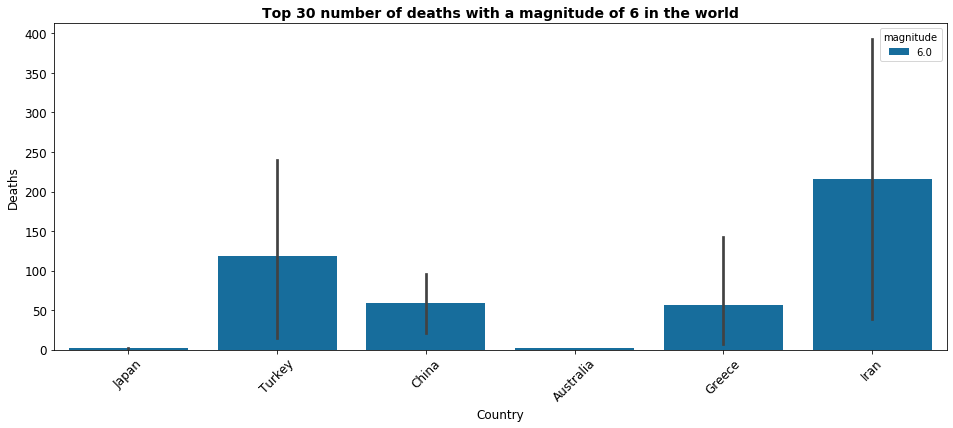

In [73]:
fontsize = 12

plt.figure(figsize=(16,6))
sns.barplot(data= world_quake_mag_6.nlargest(30, 'magnitude'),x ="country",y="deaths", hue="magnitude", palette ="colorblind")
plt.xticks(rotation = 45)
plt.xticks(fontsize = fontsize)
plt.xlabel('Country', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Deaths', fontsize = fontsize)
plt.title('Top 30 number of deaths with a magnitude of 6 in the world', fontsize = 14, fontweight = 'bold');

## 3/Correlation between deaths and factors:

I apply a log to # of deaths to see if I get a better correlation:

In [69]:
world_earthquake['log_deaths'] = world_earthquake['deaths'].apply(np.log)

In [70]:
world_earthquake[['year','depth', 'magnitude', 'deaths', 'log_deaths']].corr()

,year,depth,magnitude,deaths,log_deaths
year,1.000000,0.013030,-0.346927,-0.038838,-0.347260
depth,0.013030,1.000000,0.170129,-0.020222,-0.112834
magnitude,-0.346927,0.170129,1.000000,0.137988,0.434967
deaths,-0.038838,-0.020222,0.137988,1.000000,0.316760
log_deaths,-0.347260,-0.112834,0.434967,0.316760,1.000000


The best correlation is magnitude and then maybe year? Surprisingly depth is definitely not a factor:

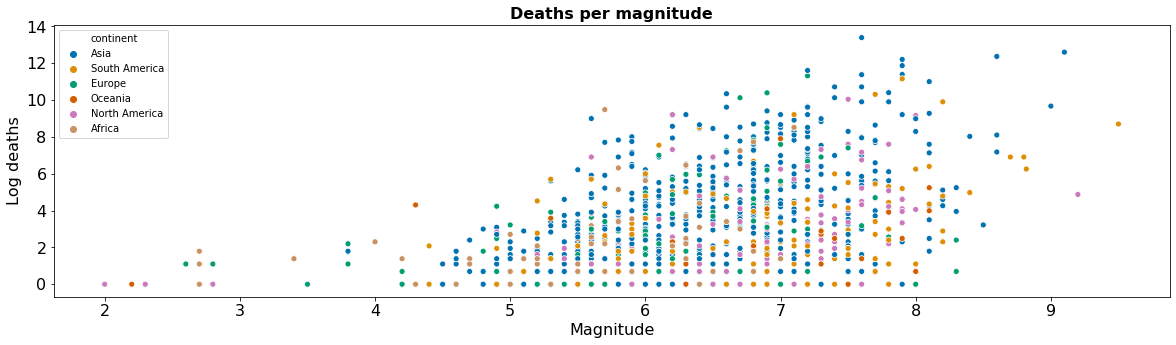

In [71]:
fontsize = 16

plt.figure(figsize = (20,5))
sns.scatterplot(data=world_earthquake, x="magnitude", y="log_deaths", hue="continent", palette ="colorblind")
plt.xticks(fontsize = fontsize)
plt.xlabel('Magnitude', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Log deaths', fontsize = fontsize)
plt.title('Deaths per magnitude', fontsize = fontsize, fontweight = 'bold');

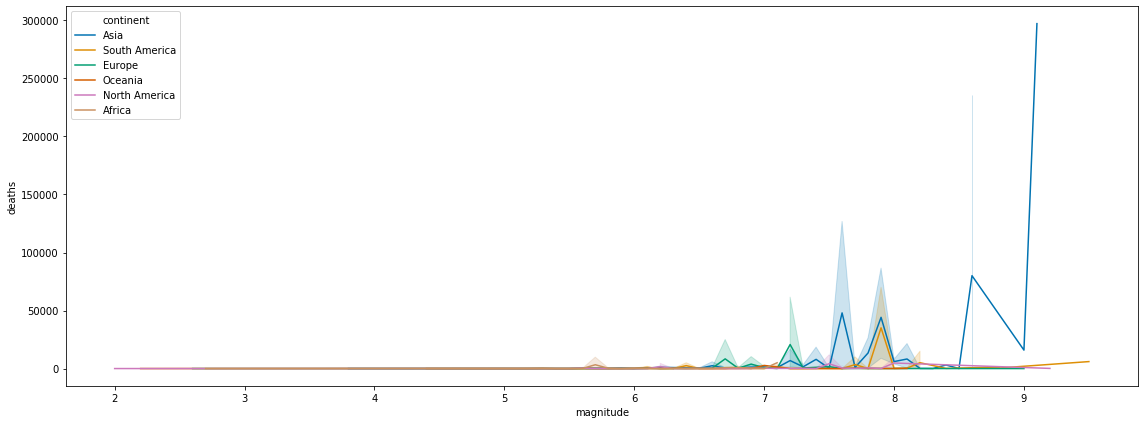

In [67]:
plt.figure(figsize=(16,6))
sns.lineplot(data= world_earthquake,x ="magnitude",y="deaths", hue="continent", palette ="colorblind")


plt.tight_layout()
plt.savefig('deaths by year per continent.tif', dpi = 150);

I don't see anything for year:

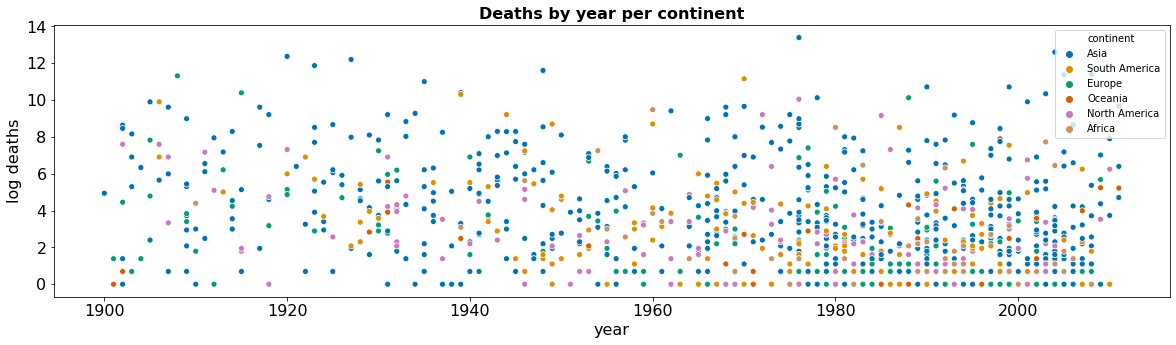

In [72]:
fontsize = 16

plt.figure(figsize = (20,5))
sns.scatterplot(data=world_earthquake, x="year", y="log_deaths", hue="continent", palette ="colorblind")
plt.xticks(fontsize = fontsize)
plt.xlabel('year', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('log deaths', fontsize = fontsize)
plt.title('Deaths by year per continent', fontsize = fontsize, fontweight = 'bold');

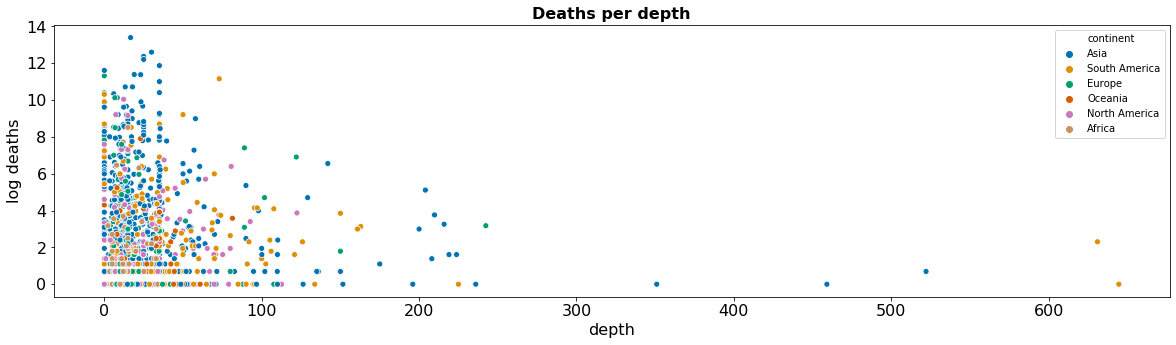

In [17]:
fontsize = 16

plt.figure(figsize = (20,5))
sns.scatterplot(data=world_earthquake, x="depth", y="log_deaths", hue="continent", palette ="colorblind")
plt.xticks(fontsize = fontsize)
plt.xlabel('depth', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('log deaths', fontsize = fontsize)
plt.title('Deaths per depth', fontsize = fontsize, fontweight = 'bold');

I find only a correlation between the number of death and the magnitude intensity.

## 3/ Explore few countries:

### 1/ China:

In [18]:
earthquake_china = world_earthquake[world_earthquake.country == "China"]

In [19]:
earthquake_china.head()

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent,log_deaths
189,1901-02-15 00:00:00,1901,2,15,00:00:00,China,26.0,100.1,0.0,6.5,NaN,0,Asia,-inf
190,1902-07-03 15:36:00,1902,7,3,15:36:00,China,43.2,129.6,20.0,6.7,NaN,0,Asia,-inf
191,1902-08-22 03:00:00,1902,8,22,03:00:00,China,40.0,77.0,0.0,7.7,NaN,5650,Asia,8.639411
192,1904-08-30 11:42:00,1904,8,30,11:42:00,China,30.0,101.0,0.0,6.8,NaN,565,Asia,6.336826
193,1906-12-22 18:21:00,1906,12,22,18:21:00,China,43.5,85.0,0.0,7.2,NaN,285,Asia,5.652489


In [20]:
# Export
earthquake_china.to_csv('../data/earthquake_china_clean.csv', index = False)

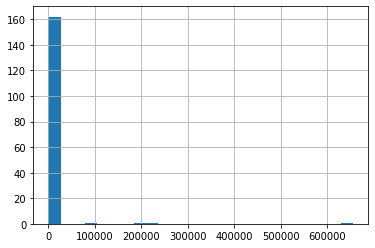

In [21]:
earthquake_china['deaths'].hist(bins = 25);

Histogram is skewed to the right which mean that most earthquakes are not deadly!

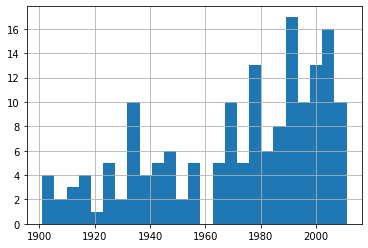

In [22]:
earthquake_china['year'].hist(bins = 25);

There is an increase of earthquake over the years, or there is a better detection of earthquakes

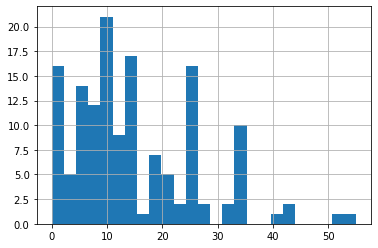

In [23]:
earthquake_china['depth'].hist(bins = 25);

Depth over 50 is pretty rare.

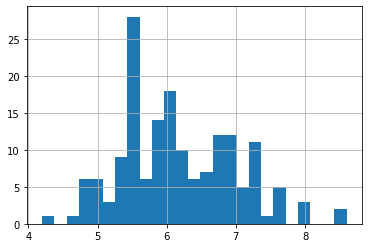

In [24]:
earthquake_china['magnitude'].hist(bins = 25);

Magnitude is a fairly normal distribution between 4 and 8.

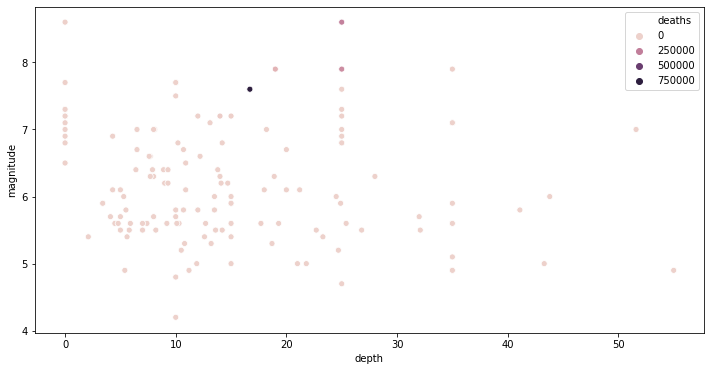

In [25]:
plt.figure(figsize = (12,6))
sns.scatterplot(data=earthquake_china, x="depth", y="magnitude", hue="deaths");

In China, the deadliest events had a magnitude over 7.5 but they were not very deep...

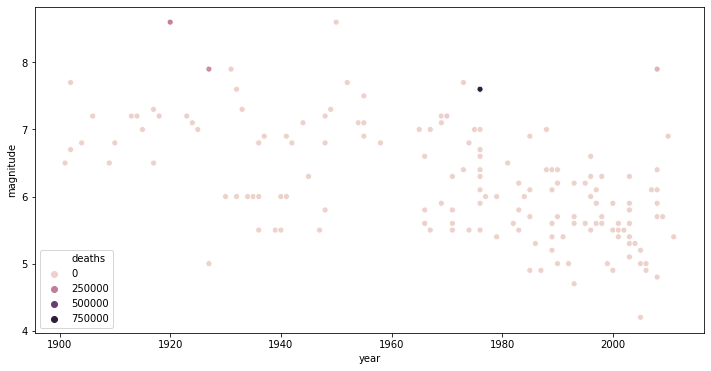

In [26]:
plt.figure(figsize = (12,6))
sns.scatterplot(data=earthquake_china, x="year", y="magnitude", hue="deaths");

Interestingly in 1976, there is 9 earthquakes reported with one at 7.6 magnitude and the deadliest. Other years there is not as many earthquakes usually. There were 2 deadly earthquakes in 1920 at 8.6 and 1927 at 7.9, however there is no other earthquakes these years... 
Should I look more into that?

In [27]:
earthquake_china[(earthquake_china.year == 1976)]

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent,log_deaths
262,1976-04-05 16:54:00,1976,4,5,16:54:00,China,40.230,112.222,7.0,5.5,NaN,28,Asia,3.332205
263,1976-05-29 12:23:00,1976,5,29,12:23:00,China,24.501,98.930,6.5,6.7,NaN,98,Asia,4.584967
264,1976-05-29 14:00:00,1976,5,29,14:00:00,China,24.581,98.610,7.6,6.6,NaN,0,Asia,-inf
265,1976-07-21 15:10:00,1976,7,21,15:10:00,China,24.768,98.667,4.3,6.1,NaN,11,Asia,2.397895
266,1976-07-27 19:42:00,1976,7,27,19:42:00,China,39.605,117.888,16.7,7.6,NaN,655237,Asia,13.392752
267,1976-07-28 10:45:00,1976,7,28,10:45:00,China,39.723,118.359,18.2,7.0,NaN,0,Asia,-inf
268,1976-08-16 14:06:00,1976,8,16,14:06:00,China,32.753,104.088,10.7,6.7,NaN,0,Asia,-inf
269,1976-08-23 03:30:00,1976,8,23,03:30:00,China,32.481,104.182,7.9,6.4,NaN,41,Asia,3.713572
270,1976-11-06 18:04:00,1976,11,6,18:04:00,China,27.554,101.021,7.7,6.3,NaN,33,Asia,3.496508
271,1976-12-13 06:36:00,1976,12,13,06:36:00,China,27.336,101.024,3.4,5.9,NaN,2,Asia,0.693147


It looks like it was impossible to predict the deadliest earthquake in China in July 1976... no previous earquake in that location occured this year.

In [28]:
# Adding population in China
pop_china = pd.read_csv('../data/china.csv')
pop_china.head()

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Shanghai,31.222222,121.458056,China,CN,Shanghai,admin,14987000.0,14608512.0
1,Beijing,39.928819,116.388869,China,CN,Beijing,primary,11106000.0,7480601.0
2,Guangzhou,23.116667,113.250000,China,CN,Guangdong,admin,8829000.0,3152825.0
3,Shenzhen,22.533333,114.133333,China,CN,Guangdong,minor,7581000.0,1002592.0
4,Wuhan,30.583333,114.266667,China,CN,Hubei,admin,7243000.0,4184206.0


In [29]:
# cleaning
pop_china = (pop_china
          .drop(columns = ['iso2','admin','capital', 'population_proper' ])
          .rename(columns = {'lat': 'latitude', 'lng': 'longitude'})
         )

pop_china.shape

(2187, 5)

In [30]:
pop_china.head()

,city,latitude,longitude,country,population
0,Shanghai,31.222222,121.458056,China,14987000.0
1,Beijing,39.928819,116.388869,China,11106000.0
2,Guangzhou,23.116667,113.250000,China,8829000.0
3,Shenzhen,22.533333,114.133333,China,7581000.0
4,Wuhan,30.583333,114.266667,China,7243000.0


In [31]:
# Export
pop_china.to_csv('../data/china_pop_clean.csv', index = False)

Making a plot with population and # of death and using lat and long:

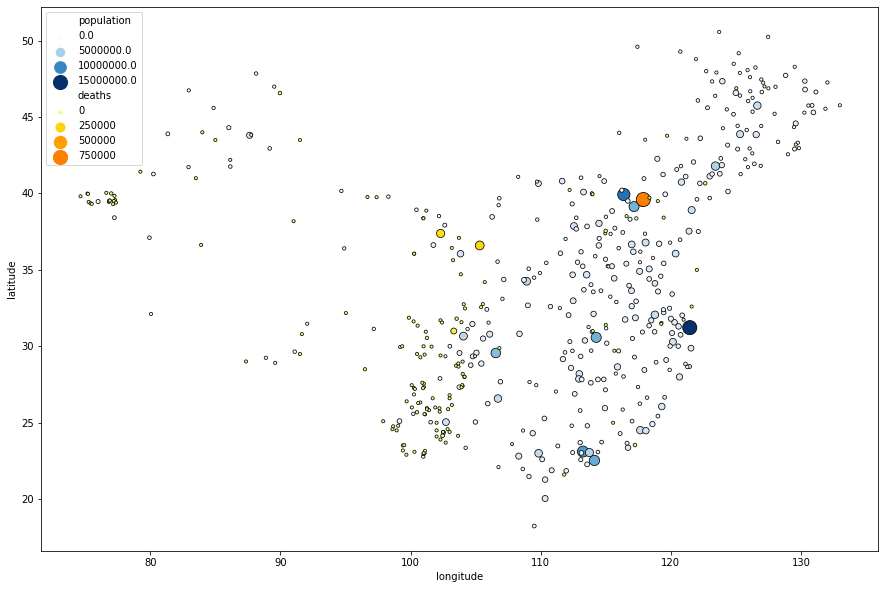

In [32]:
plt.figure(figsize = (15,10))#RdYlGn_r Wistia spring_r

sns.scatterplot(data=pop_china, x="longitude", y="latitude", hue="population", palette="Blues", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_china, x="longitude", y="latitude", hue="deaths",palette="Wistia", size="deaths", sizes=(10, 200), edgecolor = 'black');

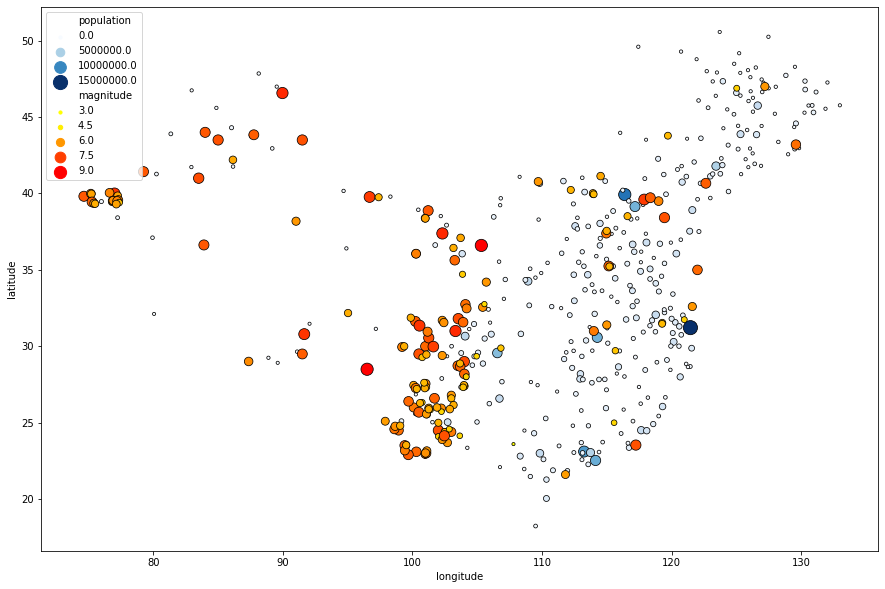

In [33]:
plt.figure(figsize = (15,10))#summer_r

sns.scatterplot(data=pop_china, x="longitude", y="latitude", hue="population", palette="Blues", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_china, x="longitude", y="latitude", hue="magnitude",palette="autumn_r", size="magnitude", sizes=(10, 150), edgecolor = 'black');

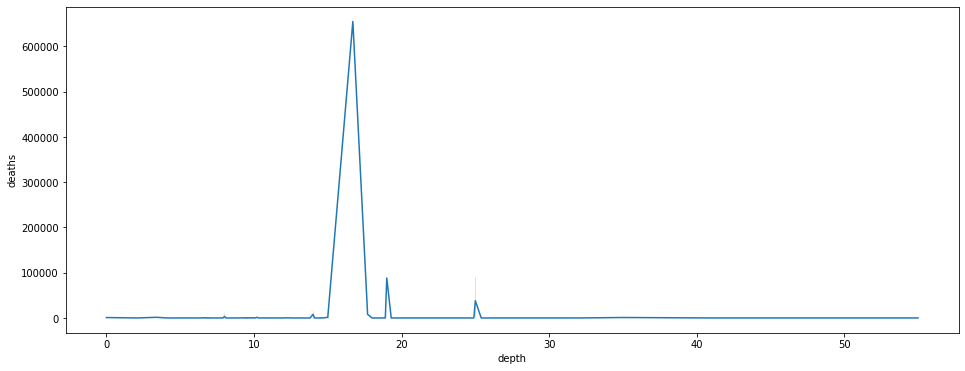

In [34]:
plt.figure(figsize=(16,6))
sns.lineplot(data= earthquake_china,x ="depth",y="deaths");

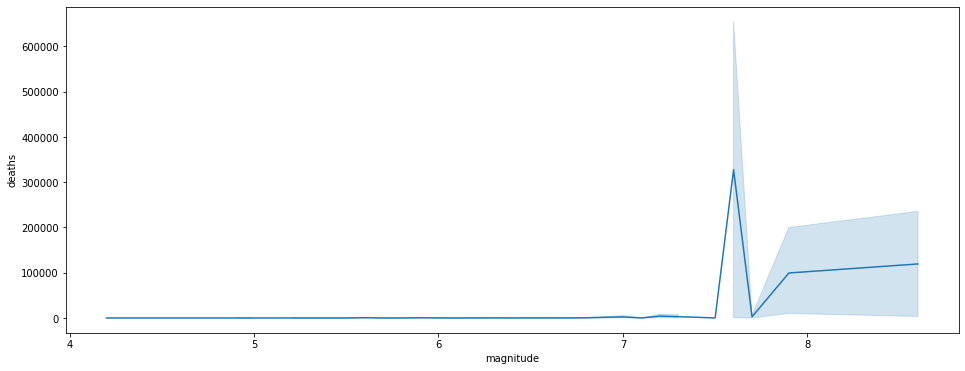

In [35]:
plt.figure(figsize=(16,6))
sns.lineplot(data= earthquake_china,x ="magnitude",y="deaths");

In [36]:
earthquake_china[["magnitude",  "deaths"]].corr()

,magnitude,deaths
magnitude,1.000000,0.275477
deaths,0.275477,1.000000


In [ ]:
#china_quake_pop_merge = earthquake_china.merge(pop_china, on= ('country','latitude', 'longitude'), how = 'outer')
#china_quake_pop_merge.head()

In [ ]:
#plt.figure(figsize=(16,6))
#sns.scatterplot(data = china_quake_pop_merge, x="magnitude", y='log_deaths');

In [37]:
earthquake_china[["magnitude",  "log_deaths"]].corr()

,magnitude,log_deaths
magnitude,1.000000,0.713104
log_deaths,0.713104,1.000000


I find a good correlation between magnitude of the earthquake and the number of death in China after applying a log.

### 2/ Pakistan

In [ ]:
earthquake_pakistan = world_earthquake[world_earthquake.country == "Pakistan"]
earthquake_pakistan.head()

In [ ]:
pop_pakistan = pd.read_csv('../data/pakistan.csv')
pop_pakistan.head()

In [ ]:
pop_pakistan = (pop_pakistan
          .drop(columns = ['iso2','admin','capital', 'population_proper' ])
          .rename(columns = {'lat': 'latitude', 'lng': 'longitude'})
         )

pop_pakistan.head()

In [ ]:
plt.figure(figsize = (20,10))

sns.scatterplot(data=pop_pakistan, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_pakistan, x="longitude", y="latitude", hue="deaths",palette="autumn_r", size="deaths", sizes=(10, 200), edgecolor = 'black');

### 3/ Italy

In [ ]:
earthquake_italy = world_earthquake[world_earthquake.country == "Italy"]
earthquake_italy.head()

In [ ]:
pop_italy = pd.read_csv('../data/italy.csv')
pop_italy.head()

In [ ]:
pop_italy = (pop_italy
          .drop(columns = ['iso2','admin','capital', 'population_proper' ])
          .rename(columns = {'lat': 'latitude', 'lng': 'longitude'})
         )

pop_italy.head()

In [ ]:
plt.figure(figsize = (20,10))

sns.scatterplot(data=pop_italy, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_italy, x="longitude", y="latitude", hue="deaths",palette="autumn_r", size="deaths", sizes=(10, 200), edgecolor = 'black');

### 4/ Iran

In [ ]:
earthquake_iran = world_earthquake[world_earthquake.country == "Iran"]

In [ ]:
pop_iran = pd.read_csv('../data/iran.csv')

In [ ]:
pop_iran = (pop_iran
          .drop(columns = ['iso2','admin','capital', 'population_proper' ])
          .rename(columns = {'lat': 'latitude', 'lng': 'longitude'})
         )


In [ ]:
plt.figure(figsize = (20,10))

sns.scatterplot(data=pop_iran, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_iran, x="longitude", y="latitude", hue="deaths",palette="autumn_r", size="deaths", sizes=(10, 200), edgecolor = 'black');

### 5/ India

In [ ]:
earthquake_india = world_earthquake[world_earthquake.country == "India"]

In [ ]:
pop_india = pd.read_csv('../data/india.csv')

In [ ]:
pop_india = (pop_india
          .drop(columns = ['iso2','admin','capital', 'population_proper' ])
          .rename(columns = {'lat': 'latitude', 'lng': 'longitude'})
         )


In [ ]:
plt.figure(figsize = (20,10))

sns.scatterplot(data=pop_india, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_india, x="longitude", y="latitude", hue="deaths",palette="autumn_r", size="deaths", sizes=(10, 200), edgecolor = 'black');

### 6/ Explore Japan: Death principal cause is tsunami

In [ ]:
earthquake_japan = world_earthquake[world_earthquake.country == "Japan"]

In [ ]:
pop_japan = pd.read_csv('../data/japan.csv')

In [ ]:
pop_japan = (pop_japan
          .drop(columns = ['iso2','admin','capital', 'population_proper' ])
          .rename(columns = {'lat': 'latitude', 'lng': 'longitude'})
         )

In [ ]:
plt.figure(figsize = (20,10))

sns.scatterplot(data=pop_japan, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_japan, x="longitude", y="latitude", hue="deaths",palette="autumn_r", size="deaths", sizes=(10, 200), edgecolor = 'black');